In [32]:
import matplotlib.pyplot as plt 
import torch 
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.transforms import ToTensor
from dataloader import WHU_bldg

In [34]:
# HYPERPARAMETERS

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('device:' , device)

BATCH_SIZE = 8

device: cuda


In [49]:
def unnormalize(tensor):
    
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225] 
    mean = torch.tensor(mean).reshape(-1, 1, 1)
    std = torch.tensor(std).reshape(-1, 1, 1)
    tensor = tensor * std + mean
    return tensor

In [50]:
dataset_dir = "/dataset/deepglobe-2018-road-extraction"

transform_rgb = transforms.Compose([
    transforms.PILToTensor(),
    transforms.ConvertImageDtype(torch.float32),  # Converts the tensor to float and scales to [0.0, 1.0]
    transforms.Resize((512 , 512)),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Example normalization
])

transform_grey = transforms.Compose([
    transforms.PILToTensor(),
    transforms.ConvertImageDtype(torch.float32),
])


In [74]:
train = WHU_bldg(parent_dir = "dataset" , set = "train" , transform_rgb= transform_rgb , transform_grey = transform_grey)
val = WHU_bldg(parent_dir = "dataset" , set = "val" , transform_rgb= transform_rgb , transform_grey = transform_grey)
test = WHU_bldg(parent_dir = "dataset" , set = "test" , transform_rgb= transform_rgb , transform_grey = transform_grey)

Display a sample

In [78]:
image , mask = train[10]
image = unnormalize(image)

image = image.permute(1 , 2, 0).numpy()
mask = mask.squeeze().numpy()
image.shape , mask.shape

((512, 512, 3), (512, 512))

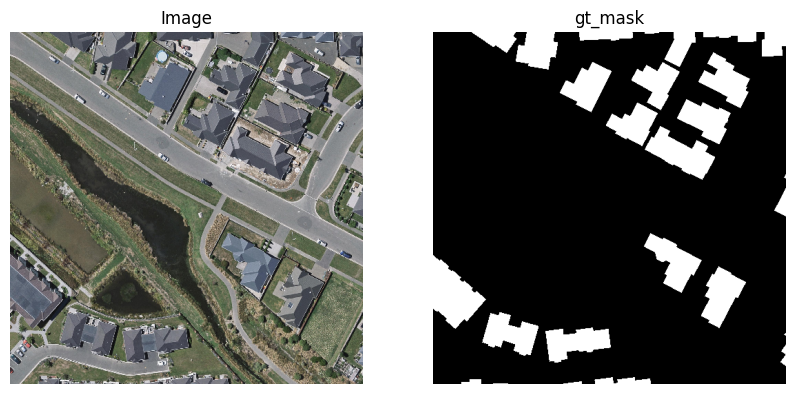

In [79]:
plt.figure(figsize=(10,5))

plt.subplot(1 , 2 , 1)
plt.imshow(image)
plt.title('Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(mask , cmap = 'gray')
plt.title('gt_mask')
plt.axis('off')

plt.show()

In [80]:
train_loader = DataLoader(dataset = train , batch_size = BATCH_SIZE , shuffle= True)
val_loader = DataLoader(dataset = val , batch_size = BATCH_SIZE , shuffle = True)
test_loader = DataLoader(dataset = test , shuffle = False)

len(train_loader) , len(val_loader) # batches

(592, 130)